# Exploratory Data Analysis

Your Name  
2025-04-25

In [1]:
import pandas as pd
eda = pd.read_csv('./data/eda_data.csv')
eda.head()

5 rows × 21 columns

In [2]:
# identifying data analyst jobs by keyword searching
keywords = ['Data Analyst', 'Business Analyst', 'Data Engineering', 'Deep Learning',
            'Data Science', 'Data Analysis','Data Analytics',  'Market Research Analyst' 
            'LLM', 'Language Model', 'NLP', 'Natural Language Processing',
            'Computer Vision', 'Business Intelligence Analyst', 'Quantitative Analyst', 'Operations Analyst']

match = lambda col: eda[col].str.contains('|'.join(keywords), case=False, na=False)

eda['DATA_ANALYST_JOB'] = match('TITLE_NAME') \
             | match('SKILLS_NAME') \
             | match('SPECIALIZED_SKILLS_NAME') 
eda['DATA_ANALYST_JOB'].value_counts()

DATA_ANALYST_JOB
False    37575
True     32600
Name: count, dtype: int64

In [3]:
import plotly.express as px
import plotly.graph_objects as go

# Group data (same as before)
df_grouped = eda.groupby(['DATA_ANALYST_JOB', 'NAICS2_NAME']).size().reset_index(name='Job_Count')

# Shorten the industry names (NAICS2_NAME) for better readability
# Assuming NAICS2_NAME has long names, we'll map them to shorter versions
# Example: Replace long names with abbreviations or shorter terms
industry_short_names = {
    'Professional, Scientific, and Technical Services': 'Prof. Services',
    'Administrative and Support and Waste Management and Remediation Services': 'Admin & Waste Mgmt',
    'Health Care and Social Assistance': 'Healthcare',
    'Finance and Insurance': 'Finance',
    'Information': 'Info Tech',
    'Educational Services': 'Education',
    'Manufacturing': 'Manufacturing',
    'Retail Trade': 'Retail',
    'Accommodation and Food Services': 'Hospitality',
    'Other Services (except Public Administration)': 'Other Services',
    # Add more mappings as needed based on your dataset
}

# Apply the shortened names to the dataframe
df_grouped['NAICS2_NAME_SHORT'] = df_grouped['NAICS2_NAME'].map(industry_short_names).fillna(df_grouped['NAICS2_NAME'])

# Define a vibrant and modern color palette
color_map = {
    False: "#FF6B6B",  # Coral red for False
    True: "#4ECDC4"    # Teal for True
}

# Create the bar plot with Plotly Express
fig = px.bar(df_grouped, 
             x='NAICS2_NAME_SHORT',  # Use shortened names
             y='Job_Count',
             color='DATA_ANALYST_JOB',
             title="Data & Business Analytics Job Trends",
             labels={'NAICS2_NAME_SHORT': 'Industry', 'Job_Count': 'Number of Jobs'},
             barmode='group',
             color_discrete_map=color_map
            )

# Beautify the layout with a modern, clean design
fig.update_layout(
    # Sizing and margins
    autosize=True,
    width=1100,  # Slightly narrower for better focus
    height=650,  # Adjusted height
    margin=dict(l=50, r=50, t=90, b=120),  # Adjusted margins for cleaner look

    # Background and plot styling
    plot_bgcolor='rgba(240, 240, 245, 1)',  # Softer gray background
    paper_bgcolor='rgba(255, 255, 255, 1)',  # White paper background
    font=dict(family="Helvetica, sans-serif", size=14, color="#2D3748"),  # Modern font

    # Title styling
    title=dict(
        text="Data & Business Analytics Job Trends",
        font=dict(size=26, color="#2D3748", family="Helvetica, sans-serif"),
        x=0.5,  # Center the title
        xanchor="center",
        y=0.95,
        yanchor="top"
    ),

    # X-axis styling
    xaxis=dict(
        title="Industry",
        title_font=dict(size=18, color="#2D3748"),
        tickfont=dict(size=13, color="#4A5568"),
        tickangle=-30,  # Slightly less aggressive rotation
        gridcolor="rgba(200, 200, 200, 0.2)",  # Very light gridlines
        linecolor="#2D3748",
        linewidth=2,
        showline=True
    ),

    # Y-axis styling
    yaxis=dict(
        title="Number of Jobs",
        title_font=dict(size=18, color="#2D3748"),
        tickfont=dict(size=13, color="#4A5568"),
        range=[0, df_grouped['Job_Count'].max() * 1.15],  # Slightly tighter range
        gridcolor="rgba(200, 200, 200, 0.2)",
        linecolor="#2D3748",
        linewidth=2,
        showline=True
    ),

    # Legend styling
    legend=dict(
        title="Job Type",
        font=dict(size=13, color="#2D3748"),
        bgcolor="rgba(255, 255, 255, 0.95)",
        bordercolor="#2D3748",
        borderwidth=1,
        x=1.02,  # Position outside
        y=0.5,
        xanchor="left",
        yanchor="middle"
    ),

    # Hover and interactivity
    hovermode="closest",
    hoverlabel=dict(
        bgcolor="rgba(255, 255, 255, 0.9)",
        font_size=13,
        font_family="Helvetica, sans-serif",
        font_color="#2D3748",
        bordercolor="#2D3748"
    ),

    # Add a subtle shadow effect for depth
    bargap=0.2,  # Add space between bars for clarity
)

# Customize the bars
fig.update_traces(
    marker=dict(
        line=dict(width=1.2, color="#2D3748"),  # Thinner border for elegance
        # Add a gradient effect to the bars
        coloraxis=None,
    ),
    opacity=0.85,  # Slight transparency for softness
    text=df_grouped['Job_Count'],  # Add labels on bars
    textposition='outside',  # Place labels outside for clarity
    textfont=dict(size=12, color="#2D3748", family="Helvetica, sans-serif"),
    texttemplate='%{text}',  # Show just the number
)

# Add a subtle annotation for the highest job count
max_job = df_grouped.loc[df_grouped['Job_Count'].idxmax()]
fig.add_annotation(
    x=max_job['NAICS2_NAME_SHORT'],
    y=max_job['Job_Count'] * 1.1,
    text=f"Top: {max_job['NAICS2_NAME_SHORT']}<br>{max_job['Job_Count']} Jobs",
    showarrow=True,
    arrowhead=1,
    ax=20,
    ay=-40,
    font=dict(size=13, color="#2D3748", family="Helvetica, sans-serif"),
    bgcolor="rgba(255, 255, 255, 0.85)",
    bordercolor="#2D3748",
    borderwidth=1,
    borderpad=4
)


In [4]:
import plotly.express as px
import plotly.graph_objects as go

# Identify the top 10 industries with the most data analyst jobs
top_industries = df_grouped.groupby("NAICS2_NAME")["Job_Count"].sum().nlargest(10).index

# Filter the dataset for top industries
df_top_industries = df_grouped[df_grouped["NAICS2_NAME"].isin(top_industries)].copy()

# Shorten industry names for better readability
industry_short_names = {
    'Professional, Scientific, and Technical Services': 'Prof. Services',
    'Administrative and Support and Waste Management and Remediation Services': 'Admin & Waste Mgmt',
    'Health Care and Social Assistance': 'Healthcare',
    'Finance and Insurance': 'Finance',
    'Information': 'Info Tech',
    'Educational Services': 'Education',
    'Manufacturing': 'Manufacturing',
    'Retail Trade': 'Retail',
    'Accommodation and Food Services': 'Hospitality',
    'Other Services (except Public Administration)': 'Other Services',
}
df_top_industries['NAICS2_NAME_SHORT'] = df_top_industries['NAICS2_NAME'].map(industry_short_names).fillna(df_top_industries['NAICS2_NAME'])

# Update DATA_ANALYST_JOB labels for clarity
df_top_industries['Job_Category'] = df_top_industries['DATA_ANALYST_JOB'].map({True: 'Data Analyst', False: 'Business Analyst'})

# Define a modern, vibrant color palette for industries (10 colors for top 10 industries)
color_palette = [
    '#FF6B6B',  # Coral Red
    '#4ECDC4',  # Teal
    '#45B7D1',  # Sky Blue
    '#96CEB4',  # Sage Green
    '#FFEEAD',  # Soft Yellow
    '#D4A5A5',  # Dusty Rose
    '#9B59B6',  # Purple
    '#3498DB',  # Bright Blue
    '#E67E22',  # Orange
    '#1ABC9C',  # Turquoise
]
color_map = {industry: color for industry, color in zip(df_top_industries['NAICS2_NAME_SHORT'].unique(), color_palette)}

# Create the bar chart
fig = px.bar(df_top_industries, 
             x="Job_Category",  # Use the updated labels
             y="Job_Count", 
             color="NAICS2_NAME_SHORT",
             title="Top 10 Industries Hiring Data & Business Analysts",
             labels={'Job_Category': 'Job Category', 'Job_Count': 'Number of Jobs', 'NAICS2_NAME_SHORT': 'Industry'},
             barmode='group')

# Beautify the layout
fig.update_layout(
    # Sizing and margins
    autosize=True,
    width=1150,  # Slightly wider for balance
    height=650,  # Adjusted height
    margin=dict(l=60, r=150, t=100, b=80),  # Adjusted for legend and title

    # Background and plot styling
    plot_bgcolor='rgba(245, 245, 250, 1)',  # Very light lavender-gray
    paper_bgcolor='rgba(255, 255, 255, 1)',  # White paper background
    font=dict(family="Poppins, sans-serif", size=14, color="#2D3436"),  # Modern, elegant font

    # Title styling
    title=dict(
        text="Top 10 Industries Hiring Data & Business Analysts",
        font=dict(size=28, color="#2D3436", family="Poppins, sans-serif"),
        x=0.5,
        xanchor="center",
        y=0.95,
        yanchor="top"
    ),

    # X-axis styling
    xaxis=dict(
        title="Job Category",
        title_font=dict(size=18, color="#2D3436"),
        tickfont=dict(size=14, color="#636E72"),
        gridcolor="rgba(200, 200, 200, 0.1)",  # Very subtle gridlines
        linecolor="#2D3436",
        linewidth=2,
        showline=True,
        tickvals=['Data Analyst', 'Business Analyst'],  # Ensure clarity
    ),

    # Y-axis styling
    yaxis=dict(
        title="Number of Jobs",
        title_font=dict(size=18, color="#2D3436"),
        tickfont=dict(size=14, color="#636E72"),
        range=[0, df_top_industries['Job_Count'].max() * 1.2],  # Extended range
        gridcolor="rgba(200, 200, 200, 0.3)",
        linecolor="#2D3436",
        linewidth=2,
        showline=True
    ),

    # Legend styling
    legend=dict(
        title="Industry",
        font=dict(size=13, color="#2D3436"),
        bgcolor="rgba(255, 255, 255, 0.95)",
        bordercolor="#2D3436",
        borderwidth=1,
        x=1.02,  # Position outside
        y=0.5,
        xanchor="left",
        yanchor="middle",
        traceorder="normal",  # Ensure consistent ordering
    ),

    # Hover and interactivity
    hovermode="closest",
    hoverlabel=dict(
        bgcolor="rgba(255, 255, 255, 0.9)",
        font_size=13,
        font_family="Poppins, sans-serif",
        font_color="#2D3436",
        bordercolor="#2D3436",
        align="left"
    ),

    # Bar spacing
    bargap=0.25,  # Add space between bars
    barnorm=None,
)

# Customize the bars
fig.update_traces(
    marker=dict(
        line=dict(width=1, color="#2D3436"),  # Subtle border
        # Add a slight gradient effect using opacity
        opacity=0.9,
    ),
    text=df_top_industries['Job_Count'],  # Add labels on bars
    textposition='outside',  # Place labels outside
    textfont=dict(size=12, color="#2D3436", family="Poppins, sans-serif"),
    texttemplate='%{text}',  # Show just the number
    # Custom hover template
    hovertemplate="<b>%{fullData.name}</b><br>Category: %{x}<br>Jobs: %{y}<extra></extra>",
)

# Add a subtle gradient background effect (using shapes)
fig.add_shape(
    type="rect",
    x0=0, y0=0, x1=1, y1=1,
    xref="paper", yref="paper",
    fillcolor="rgba(220, 221, 255, 0.2)",  # Very light gradient overlay
    line=dict(width=0),
    layer="below"
)

# Add an annotation for the highest job count
max_job = df_top_industries.loc[df_top_industries['Job_Count'].idxmax()]
fig.add_annotation(
    x=max_job['Job_Category'],
    y=max_job['Job_Count'] * 1.15,
    text=f"Top: {max_job['NAICS2_NAME_SHORT']}<br>{max_job['Job_Count']} Jobs",
    showarrow=True,
    arrowhead=1,
    ax=20,
    ay=-40,
    font=dict(size=13, color="#2D3436", family="Poppins, sans-serif"),
    bgcolor="rgba(255, 255, 255, 0.9)",
    bordercolor="#2D3436",
    borderwidth=1,
    borderpad=4
)

# Add a subtle shadow effect to the title (simulated with a duplicate text)
fig.add_annotation(
    x=0.5,
    y=0.95,
    xref="paper",
    yref="paper",
    text="Top 10 Industries Hiring Data & Business Analysts",
    showarrow=False,
    font=dict(size=28, color="rgba(0, 0, 0, 0.05)", family="Poppins, sans-serif"),
    xanchor="center",
    yanchor="top",
    yshift=-2,
    xshift=2
)

In [5]:
import plotly.express as px
import plotly.graph_objects as go

# Define target industries
target_industries = ["Finance and Insurance", "Health Care and Social Assistance"]

# Filter the original DataFrame (df) instead of df_grouped
df_remote = eda[eda["NAICS2_NAME"].isin(target_industries)]

# Count occurrences of each remote type in these industries
df_remote_grouped = df_remote.groupby("REMOTE_TYPE_NAME").size().reset_index(name="Count")

# Define a modern color palette
color_map = {
    "Remote": "#6AB1E9",  # Soft Sky Blue
    "On-Site": "#EF767A",  # Soft Coral
    "Hybrid": "#49C6B7"   # Teal-Green
}

# Create the pie chart
fig = px.pie(df_remote_grouped, 
             names="REMOTE_TYPE_NAME", 
             values="Count", 
             title="Remote vs. On-Site Data Analyst Jobs in Finance & Healthcare",
             color="REMOTE_TYPE_NAME", 
             color_discrete_map=color_map)

# Beautify the layout
fig.update_layout(
    # Sizing and margins
    autosize=True,
    width=900,  # Compact width for pie charts
    height=700,  # Taller height to accommodate title and legend
    margin=dict(l=50, r=50, t=120, b=50),  # Adjusted margins for title

    # Background styling
    plot_bgcolor='rgba(240, 240, 245, 1)',  # Light gray background
    paper_bgcolor='rgba(255, 255, 255, 1)',  # White paper background
    font=dict(family="Poppins, sans-serif", size=14, color="#2D3436"),  # Modern font

    # Title styling
    title=dict(
        text="Remote vs. On-Site Data Analyst Jobs in Finance & Healthcare",
        font=dict(size=24, color="#2D3436", family="Poppins, sans-serif"),
        x=0.5,
        xanchor="center",
        y=0.95,
        yanchor="top"
    ),

    # Legend styling
    legend=dict(
        title="Remote Type",
        font=dict(size=13, color="#2D3436"),
        bgcolor="rgba(255, 255, 255, 0.95)",
        bordercolor="#2D3436",
        borderwidth=1,
        x=1.05,  # Position outside
        y=0.5,
        xanchor="left",
        yanchor="middle"
    ),

    # Hover and interactivity
    hovermode="closest",
    hoverlabel=dict(
        bgcolor="rgba(255, 255, 255, 0.9)",
        font_size=13,
        font_family="Poppins, sans-serif",
        font_color="#2D3436",
        bordercolor="#2D3436"
    ),

    # Add a subtle gradient background effect
    shapes=[
        dict(
            type="rect",
            x0=0, y0=0, x1=1, y1=1,
            xref="paper", yref="paper",
            fillcolor="rgba(220, 221, 255, 0.2)",  # Light gradient overlay
            line=dict(width=0),
            layer="below"
        )
    ]
)

# Customize the pie chart slices
fig.update_traces(
    # Add percentages and labels
    textinfo="percent+label",
    textfont=dict(size=14, color="#2D3436", family="Poppins, sans-serif"),
    textposition="inside",  # Place labels inside for a cleaner look

    # Add a subtle border to slices
    marker=dict(
        line=dict(color="#2D3436", width=1.5)
    ),

    # Pull out the largest slice slightly for emphasis
    pull=[0.1 if count == df_remote_grouped['Count'].max() else 0 for count in df_remote_grouped['Count']],

    # Add a slight opacity for a softer look
    opacity=0.9,

    # Custom hover template
    hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}<extra></extra>",

    # Add a rotation for better presentation
    rotation=45,

    # Add a subtle shadow effect to slices (simulated with opacity and border)
    sort=False  # Keep the order as in the data
)

# Add an annotation for the largest slice
max_slice = df_remote_grouped.loc[df_remote_grouped['Count'].idxmax()]
fig.add_annotation(
    x=0.5,
    y=0.1,
    xref="paper",
    yref="paper",
    text=f"Dominant Type: {max_slice['REMOTE_TYPE_NAME']}<br>{max_slice['Count']} Jobs ({fig.data[0]['values'].tolist().index(max_slice['Count'])*100/sum(fig.data[0]['values']):.1f}%)",
    showarrow=False,
    font=dict(size=13, color="#2D3436", family="Poppins, sans-serif"),
    bgcolor="rgba(255, 255, 255, 0.9)",
    bordercolor="#2D3436",
    borderwidth=1,
    borderpad=4
)

# Add a shadow effect to the title (simulated with a duplicate text)
fig.add_annotation(
    x=0.5,
    y=0.95,
    xref="paper",
    yref="paper",
    text="Remote vs. On-Site Data Analyst Jobs in Finance & Healthcare",
    showarrow=False,
    font=dict(size=24, color="rgba(0, 0, 0, 0.05)", family="Poppins, sans-serif"),
    xanchor="center",
    yanchor="top",
    yshift=-2,
    xshift=2
)


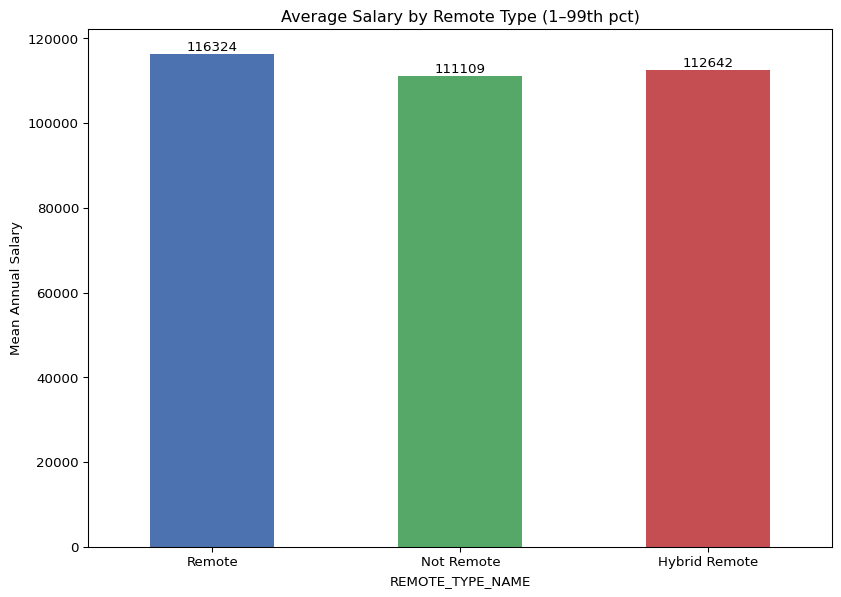

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Trim out the 1–99th percentile so outliers don’t skew the means
low, high = eda['SALARY'].quantile([0.01, 0.99])
eda_trim = eda[(eda['SALARY'] >= low) & (eda['SALARY'] <= high)]

# 2) Compute mean salary by remote type
means = eda_trim.groupby('REMOTE_TYPE_NAME')['SALARY'].mean().loc[['Remote', 'Not Remote', 'Hybrid Remote']]

# 3) Plot with value labels
plt.figure(figsize=(10, 7))
bars = means.plot.bar(color=['#4C72B0', '#55A868', '#C44E52'])
plt.title('Average Salary by Remote Type (1–99th pct)')
plt.ylabel('Mean Annual Salary')
plt.xticks(rotation=0)

# Add value labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom')

Text(0, 0.5, 'Frequency')

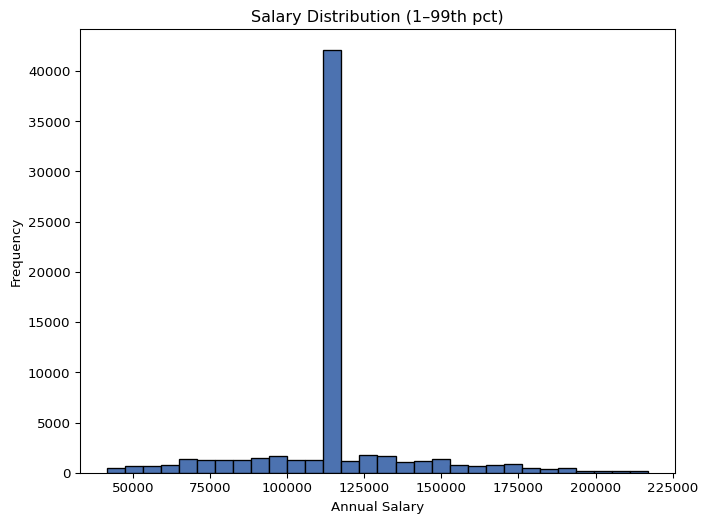

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Trim outliers
low, high = eda['SALARY'].quantile([0.01, 0.99])
eda_trim = eda[(eda['SALARY'] >= low) & (eda['SALARY'] <= high)]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(eda_trim['SALARY'], bins=30, color='#4C72B0', edgecolor='black')
plt.title('Salary Distribution (1–99th pct)')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')

In [8]:
import plotly.express as px
import pandas as pd

# Define target industries (same as before)
target_industries = ["Finance and Insurance", "Health Care and Social Assistance"]

# Filter the original DataFrame for these industries
# Assuming 'df' has a 'SALARY' column (from our regression analysis context)
df_target = eda[eda["NAICS2_NAME"].isin(target_industries)].copy()

# Map DATA_ANALYST_JOB to meaningful labels
df_target['Job_Category'] = df_target['DATA_ANALYST_JOB'].map({True: 'Data Analyst', False: 'Business Analyst'})

# Group by Job_Category and REMOTE_TYPE_NAME, calculate average salary
df_salary_grouped = df_target.groupby(['Job_Category', 'REMOTE_TYPE_NAME'])['SALARY'].mean().reset_index(name='Avg_Salary')

# Create a grouped bar chart
fig = px.bar(df_salary_grouped,
             x='Job_Category',
             y='Avg_Salary',
             color='REMOTE_TYPE_NAME',
             title="Average Salary by Remote Type and Job Category (Finance & Healthcare)",
             labels={'Job_Category': 'Job Category', 'Avg_Salary': 'Average Salary ($)', 'REMOTE_TYPE_NAME': 'Remote Type'},
             barmode='group',
             color_discrete_map={"Remote": "#6AB1E9", "On-Site": "#EF767A", "Hybrid": "#49C6B7"})

# Beautify the layout
fig.update_layout(
    width=900,
    height=600,
    plot_bgcolor='rgba(240, 240, 245, 1)',
    paper_bgcolor='rgba(255, 255, 255, 1)',
    font=dict(family="Poppins, sans-serif", size=14, color="#2D3436"),
    title=dict(
        text="Average Salary by Remote Type and Job Category (Finance & Healthcare)",
        font=dict(size=24, color="#2D3436"),
        x=0.5,
        xanchor="center"
    ),
    xaxis=dict(
        title="Job Category",
        title_font=dict(size=18),
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title="Average Salary ($)",
        title_font=dict(size=18),
        tickfont=dict(size=14),
        gridcolor="rgba(200, 200, 200, 0.3)"
    ),
    legend=dict(
        title="Remote Type",
        font=dict(size=13),
        x=1.05,
        y=0.5,
        xanchor="left",
        yanchor="middle"
    ),
    bargap=0.2
)

# Add value labels on top of bars
fig.update_traces(
    text=df_salary_grouped['Avg_Salary'].round(2),
    textposition='outside',
    textfont=dict(size=12, color="#2D3436")
)
